<a href="https://colab.research.google.com/github/kushalkishor/Mobile-Price-Range-Prediction/blob/main/Kushal_kishor_Mobile_Price_Range_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.

**Problem Description**

The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

**Data Description -**

**Battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed** - speed at which microprocessor executes instructions

**Dual_sim** - Has dual sim support or not

**Fc** - Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt** - Weight of mobile phone

**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** - Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w** - Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last when you are

**Three_g** - Has 3G or not

**Touch_screen** - Has touch screen or not

**Wifi** - Has wifi or not

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [1]:
#Import pandas package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

**Let us read our data first**

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter project/capstone project 3/data_mobile_price_range.csv')

**Print the first 5 rows of the dataset**

In [4]:
# We can use the head() method
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
dataset.shape

(2000, 21)

There are 2000 observations in the dataset. And has 21 columns.

**Print the basic information about our dataset**

In [6]:
#We can use the info() method
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
#We can use the describe() method
dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Minimum value of px_height and sc_w cannot be zero so we need to handle that

In [8]:
# Total phones with sc_w = 0
print(len(dataset[dataset.sc_w == 0]))
# Total phones with px_height = 0
print(len(dataset[dataset.px_height == 0]))

180
2


In [9]:
#where there is sc_w and px_height is zero ,assigning mean values
dataset['sc_w'][dataset[dataset.sc_w == 0].index] = dataset.sc_w.mean()
dataset['px_height'][dataset[dataset.px_height == 0].index] = dataset.px_height.mean()

In [10]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905.0,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263.0,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216.0,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208.0,1212,1411,8,2.0,15,1,1,0,1


In [11]:
dataset.shape

(2000, 21)

In [12]:
#Description of the data
dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.000,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.000,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.500,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.000,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.000,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.000,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.000,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.500,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.000,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.000,7.00,8.0


In [13]:
#checking whether there is duplicates or not
len(dataset[dataset.duplicated()])

0

There are no duplicate values.

In [14]:
#The nunique () method returns the number of unique values for each column
dataset.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [15]:
#checking whether there is null values or not
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

We don't see any null values in the dataset now.

**Let us explore the dataset more**

Print the list of columns in a dataset.

In [16]:
#We can use the columns method
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Get Correlation between different variables**

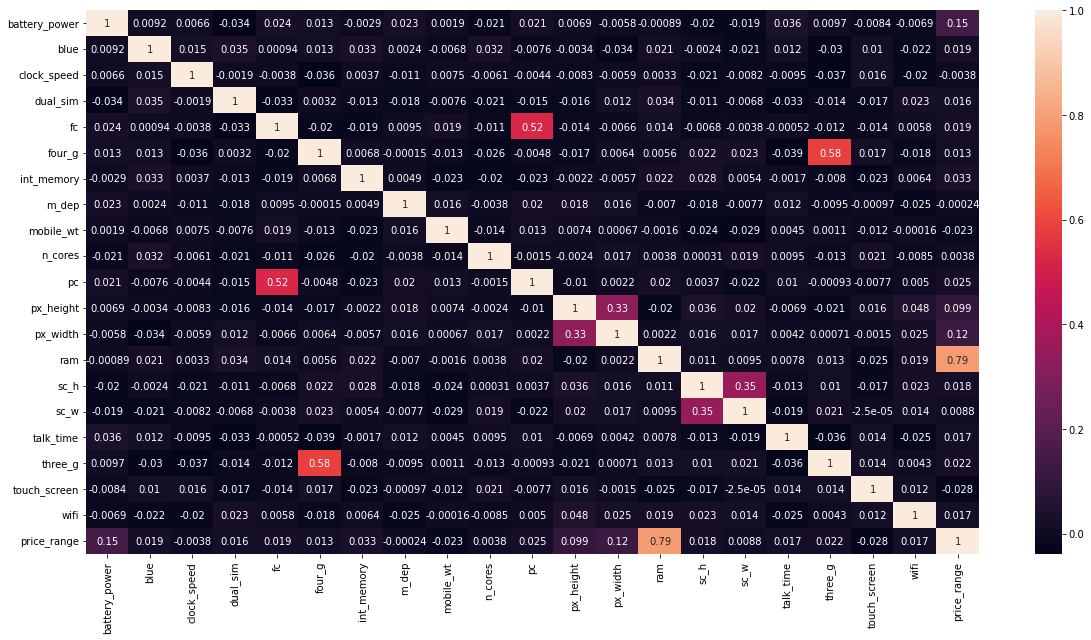

In [17]:
corr = dataset.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.show()

**Exploratory Data Analysis (EDA)**

Let us visualize the number of elements in each class of mobile phones.

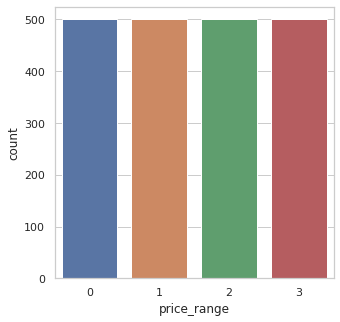

In [18]:
plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid")
sns.countplot(dataset['price_range'])
plt.show()

So, there are mobile phones in 4 price ranges. The number of elements is almost similar.

**Data Distribution**

Let us analyse some data features and see their distribution.

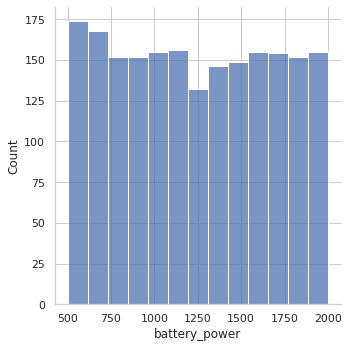

In [19]:
sns.displot(dataset['battery_power'])
plt.show()

This plot shows how the battery mAh is spread.

Now, we see the percentage count of how many devices support Bluetooth and how many does not support.

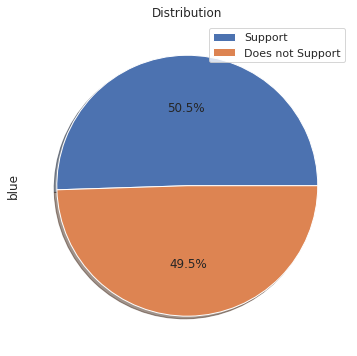

In [20]:
fig ,ax = plt.subplots(figsize = (15, 6))
dataset['blue'].value_counts().plot.pie (autopct='%1.1f%%', shadow=True, labeldistance=None)
ax.set_title('Distribution')
ax.legend(['Support', 'Does not Support'])

Now, we see the percentage count of how many devices support Dual sim and how many does not support

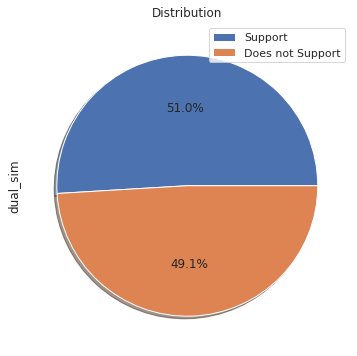

In [21]:
fig ,ax = plt.subplots(figsize = (15, 6))
dataset['dual_sim'].value_counts().plot.pie (autopct='%1.1f%%', shadow=True, labeldistance=None)
ax.set_title('Distribution')
ax.legend(['Support', 'Does not Support'])

Now, we see the percentage count of how many devices support 3G and how many does not support.

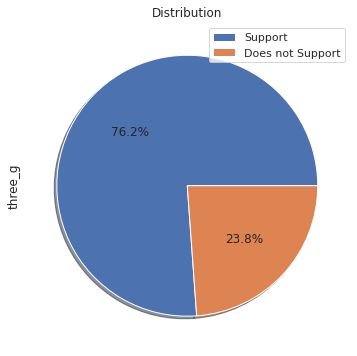

In [22]:
fig ,ax = plt.subplots(figsize = (15, 6))
dataset['three_g'].value_counts().plot.pie (autopct='%1.1f%%', shadow=True, labeldistance=None)
ax.set_title('Distribution')
ax.legend(['Support', 'Does not Support'])

Now, we see the percentage count of how many devices support 4G and how many does not support.

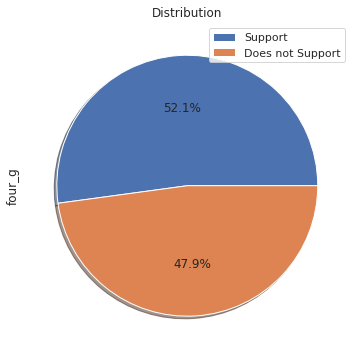

In [23]:
fig ,ax = plt.subplots(figsize = (15, 6))
dataset['four_g'].value_counts().plot.pie (autopct='%1.1f%%', shadow=True, labeldistance=None)
ax.set_title('Distribution')
ax.legend(['Support', 'Does not Support'])

Now, we see the count of how many devices have Touch screen and how many does not.

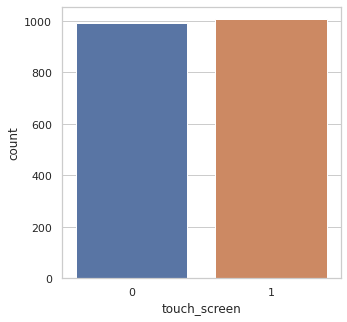

In [24]:
plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid")
sns.countplot(dataset['touch_screen'])
plt.show()

Now, we see the percentage count of how many devices support Wifi and how many does not support

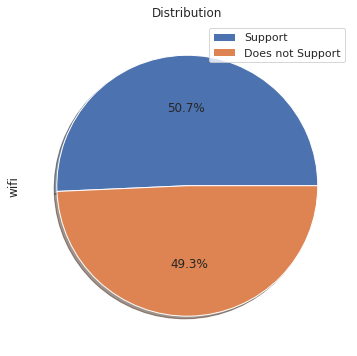

In [25]:
fig ,ax = plt.subplots(figsize = (15, 6))
dataset['wifi'].value_counts().plot.pie (autopct='%1.1f%%', shadow=True, labeldistance=None)
ax.set_title('Distribution')
ax.legend(['Support', 'Does not Support'])

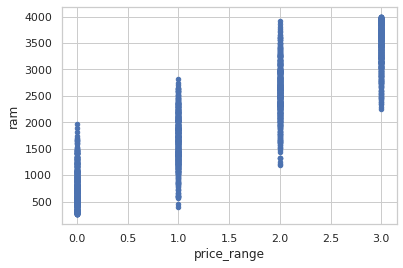

In [26]:
dataset.plot(x='price_range',y='ram',kind='scatter')
plt.show()

Ram has continuous increase with price range while moving from Low cost to Very high cost.

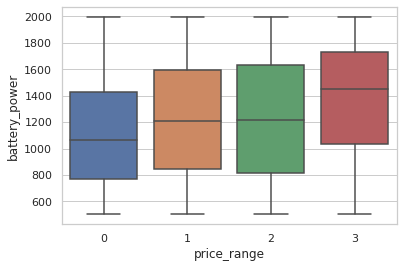

In [27]:
sns.boxplot(data=dataset, x='price_range', y='battery_power')
plt.show()

Battery power has continuous increase with price range while moving from Low cost to Very high cost.

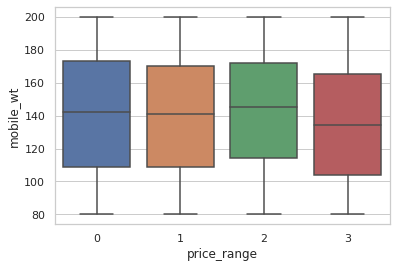

In [28]:
sns.boxplot(data=dataset, x='price_range', y='mobile_wt')
plt.show()

There is not a continuous increase in Mobile weight as we move from Low cost to Very high cost. Mobiles with very High cost has lower mobile weight.

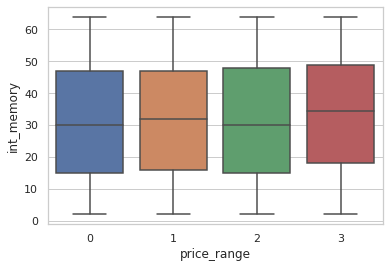

In [29]:
sns.boxplot(data=dataset, x='price_range', y='int_memory')
plt.show()

As we move from Low cost to Very high cost, Mobiles has almost equal Internal memory.

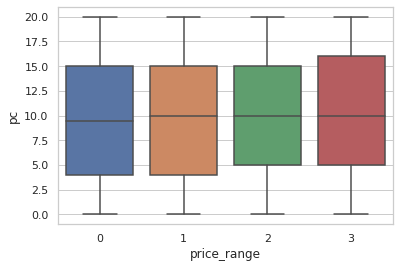

In [30]:
sns.boxplot(data=dataset, x='price_range', y='pc')
plt.show()

Primary camera megapixels are showing a little variation along the target categories.

Let's convert screen_size from cm to inches, since in real life we use inches to tell a screen size.

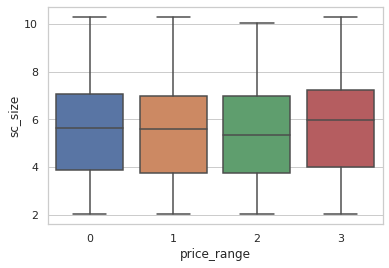

In [31]:
dataset['sc_size'] = np.sqrt((dataset['sc_h']**2) + (dataset['sc_w']**2))
dataset['sc_size'] = round(dataset['sc_size']/2.54, 2)
sns.boxplot(data=dataset, x='price_range', y='sc_size')
plt.show()

Screen Size shows little variation along the target variables.

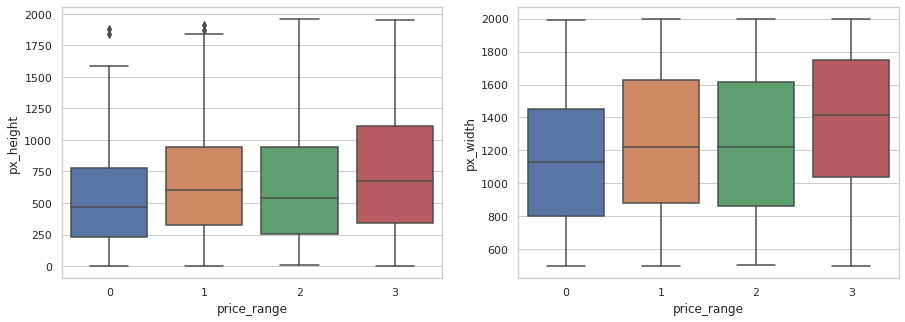

In [32]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data=dataset, x='price_range', y='px_height', ax=axs[0])
sns.boxplot(data=dataset, x='price_range', y='px_width', ax=axs[1])
plt.show()

Pixel height is almost similar as we move from Low cost to Very high cost, little variation in pixel_height.

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

As we can see from above graph there are Outliers!

**Outliers**

Outliers is also something that we should be aware of, Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis and a set of Box plots.

In [33]:
Q1 = dataset['px_height'].quantile(0.30)
Q3 = dataset['px_height'].quantile(0.70)
IQR = Q3 - Q1
print(IQR)

519.0


In [34]:
dataset = dataset[((dataset['px_height'] < (Q3+(1.5*IQR))) & (dataset['px_height'] > (Q1-(1.5*IQR))))]

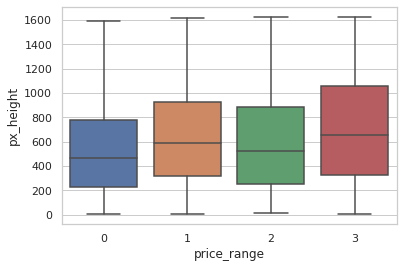

In [35]:
sns.boxplot(data=dataset, x='price_range', y='px_height')
plt.show()

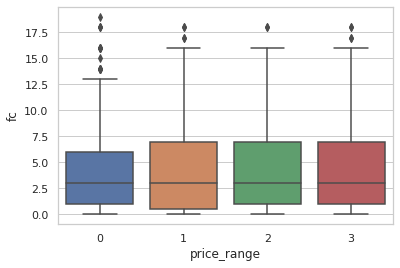

In [36]:
sns.boxplot(data=dataset, x='price_range', y='fc')
plt.show()

In [37]:
Q1 = dataset['fc'].quantile(0.30)
Q3 = dataset['fc'].quantile(0.70)
IQR = Q3 - Q1
print(IQR)

5.0


In [38]:
dataset = dataset[((dataset['fc'] < (Q3+(1.5*IQR))) & (dataset['fc'] > (Q1-(1.5*IQR))))]

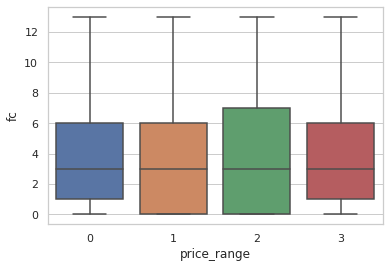

In [39]:
sns.boxplot(data=dataset, x='price_range', y='fc')
plt.show()

In [40]:
# Let's drop sc_h, s_w, px_height and px_width
dataset['pixels'] = dataset['px_height']*dataset['px_width']
dataset.drop(['px_height', 'px_width', 'sc_h', 'sc_w'], axis = 1, inplace = True)

In [41]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,sc_size,pixels
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1,4.49,15120.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2,6.80,1799140.0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2,4.40,2167308.0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2,7.04,2171776.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1,3.25,1464096.0


In [42]:
dataset.shape

(1865, 19)

In [43]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'sc_size', 'pixels'],
      dtype='object')

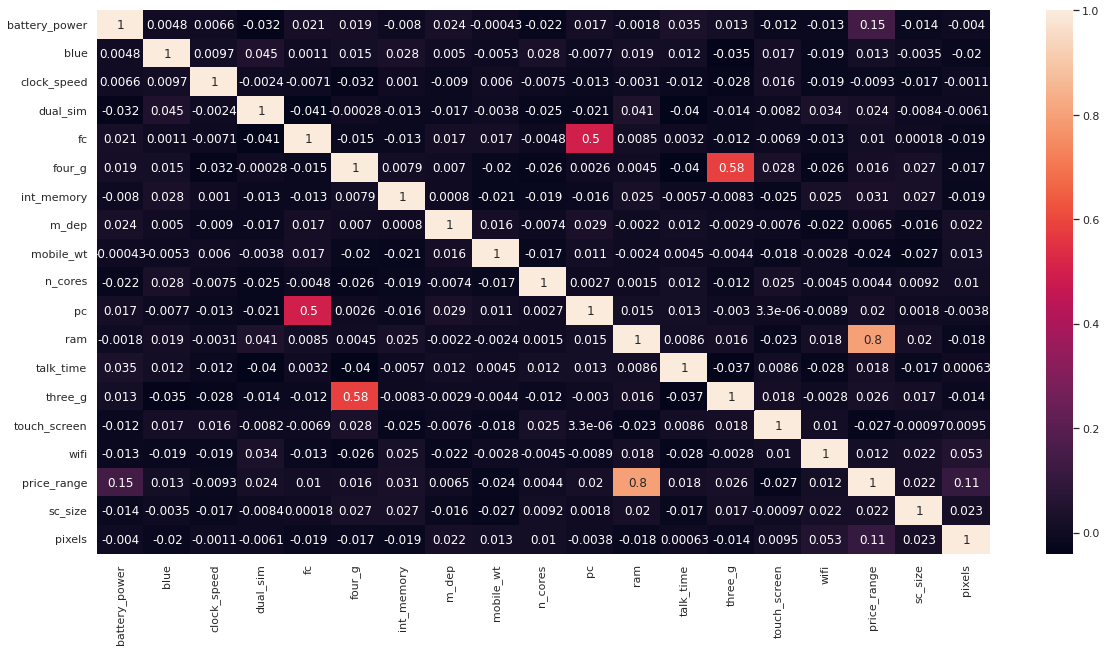

In [44]:
# Checking for multi-collinearity
corr = dataset.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.show()

In [45]:
# Defining X and y
X = dataset.drop(['price_range'], axis = 1)
y = dataset['price_range']

In [46]:
X.shape

(1865, 18)

In [47]:
y.shape

(1865,)

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
 

In [49]:
# Scaling values of X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [51]:
X_train.shape

(1492, 18)

In [52]:
y_train.shape

(1492,)

In [53]:
X_test.shape

(373, 18)

In [54]:
y_test.shape

(373,)

In [55]:
# confusion matrix
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

**Creating & Training Models**

**Logistic Regression**

In [56]:
# Applying logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Prediction
y_pred_train = lr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
print(train_score)

y_pred_test = lr.predict(X_test)
test_score= accuracy_score(y_test, y_pred_test)
print(test_score)

0.9202412868632708
0.9329758713136729


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       103
           1       0.93      0.89      0.91        97
           2       0.91      0.88      0.89        77
           3       0.96      0.96      0.96        96

    accuracy                           0.93       373
   macro avg       0.93      0.93      0.93       373
weighted avg       0.93      0.93      0.93       373



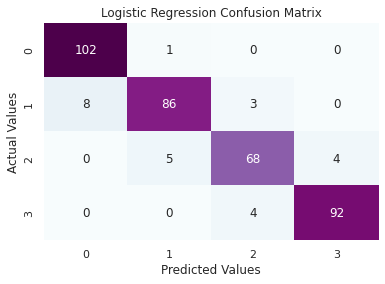

In [60]:
# Generate the confusion matrix
cm_lr=my_confusion_matrix(y_test, y_pred_test, 'Logistic Regression Confusion Matrix')

**Gaussian Naive Bayes**

In [62]:
# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Prediction
y_pred_train = gnb.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
print(train_score)

y_pred_test = gnb.predict(X_test)
test_score= accuracy_score(y_test, y_pred_test)
print(test_score)

0.8009383378016086
0.8418230563002681


              precision    recall  f1-score   support

           0       0.93      0.88      0.91       103
           1       0.79      0.84      0.81        97
           2       0.74      0.74      0.74        77
           3       0.89      0.89      0.89        96

    accuracy                           0.84       373
   macro avg       0.84      0.84      0.84       373
weighted avg       0.84      0.84      0.84       373



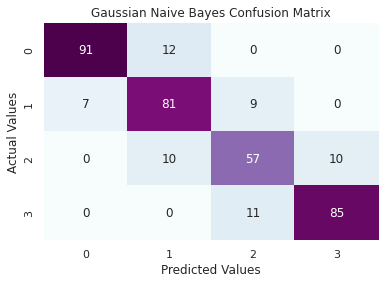

In [63]:
# Generate the confusion matrix
cm_gnb=my_confusion_matrix(y_test, y_pred_test, 'Gaussian Naive Bayes Confusion Matrix')